# Neural Network Painting an Image

Let's do this one more time. This time we will get it to work and from scratch! I'm mean really from scratch.

To understand what we are about to do, let's go over some basic concepts of neural networks.

## What is a neural network?

This is the most basic neural network that you can use:

![](images/simple_net.png)

So what is this exactly? It is a representation of a mathematical function. We can write in mathematical notation as:

$ y_1 = W_1 x_1 + b_1 $

- $x_i$ is input to the network, that is your input data.
- $W_i$ is called a weight. A higher weight will give the input more prevalence in calculating the output.
- $B_i$ is called the bias. It is a values that is optionally added to your function.

So let's visualize this function:

We will use `mathplotlib` for that, so let's impport it.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(2)
tf.logging.set_verbosity(tf.logging.WARN)

%matplotlib inline

In [2]:
x_1 = np.arange(-5,5)
W_1 = 2
b_1 = 5

y_1 = W_1 * x_1 + b_1

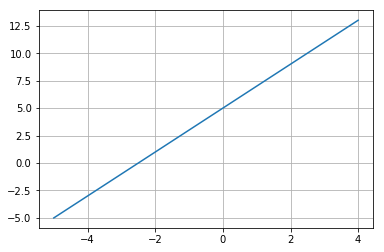

In [3]:
plt.plot(x_1, y_1)
plt.grid()

## Activation Functions

One more thing you should know about neural network which is activation functions. The network we just made has a single neuron which produced an output of what ever the input was. This is called a linear neuron.

There are other types of neurons that perform applies some function to their input. Here is a short list of some really commonly used activation functions for neurons:

### Rectifier

It is a very common activation function commonly refered to as (ReLU) which is sort for "Rectifier Linear Unit". The function is:

$$y = max(0, x)$$

It is represented in a neural network as:

![](images/relu.png)

Let's visualize that and see how it looks:

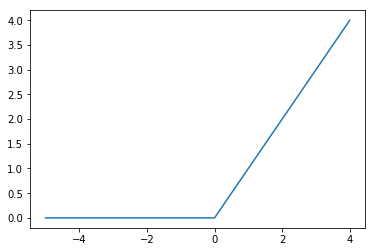

In [4]:
x = np.arange(-5, 5)
y = np.maximum(0, x)

plt.plot(x, y)

### Sigmoid

Sigmoid is another commonly used activation function. The output applies this mathematical function to its input:

$$y = \frac{e^x}{e^x + 1}$$

It is represented in neural networks as:

![](images/sigmoid.png)

Let's visualize that and see how it looks:

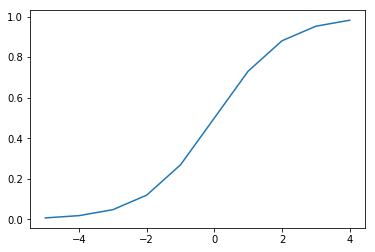

In [5]:
x = np.arange(-5,5)
y = np.exp(x)/(np.exp(x)+1)

plt.plot(x, y)

There are so many more, but let's get to the fun stuff. Let's have another go at painting `Tensy`.

What we want to build a a network that looks like this:

![](images/painter.png)

The input of this network will be a position of a pixel in the image (x,y) and the output will be the color in (RGB).

So Let's get building!

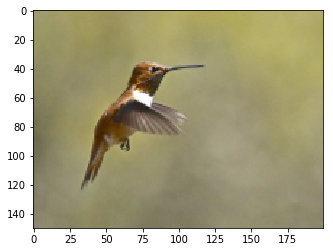

In [6]:
img = plt.imread("images/bird.png")
img = img[:,:,:3]

plt.imshow(img)

In [7]:
train_x = []
train_y = []

for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        train_x += [[h,w]]
        train_y += [img[h,w]]

train_x = np.array(train_x)
train_y = np.array(train_y)

In [8]:
with tf.variable_scope("placeholders"):
    x = tf.placeholder(tf.float32, shape=(None, 2), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 3), name="Y")

In [9]:
hidden_size = 250
with tf.variable_scope("dense_1"):
    w_1 = tf.get_variable("W_1", shape=(2,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_1 = tf.get_variable("b_1", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)
    
with tf.variable_scope("dense_2"):
    w_2 = tf.get_variable("W_2", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_2 = tf.get_variable("b_2", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)
    
with tf.variable_scope("dense_3"):
    w_3 = tf.get_variable("W_3", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_3 = tf.get_variable("b_3", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)
    
with tf.variable_scope("dense_4"):
    w_4 = tf.get_variable("W_4", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_4 = tf.get_variable("b_4", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)
    
with tf.variable_scope("dense_5"):
    w_5 = tf.get_variable("W_5", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_5 = tf.get_variable("b_5", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)
    
with tf.variable_scope("dense_6"):
    w_6 = tf.get_variable("W_6", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_6 = tf.get_variable("b_6", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)

with tf.variable_scope("dense_7"):
    w_7 = tf.get_variable("W_7", shape=(hidden_size,hidden_size), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_7 = tf.get_variable("b_7", shape=(hidden_size,), initializer=tf.truncated_normal_initializer)

with tf.variable_scope("dense_8"):
    w_8 = tf.get_variable("W_8", shape=(hidden_size,3), initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
    b_8 = tf.get_variable("b_8", shape=(3,), initializer=tf.truncated_normal_initializer)

In [28]:
l_1 = tf.nn.relu(tf.matmul(x, w_1) + b_1)
l_2 = tf.nn.relu(tf.matmul(l_1, w_2) + b_2)
l_3 = tf.nn.relu(tf.matmul(l_2, w_3) + b_3)
l_4 = tf.nn.relu(tf.matmul(l_3, w_4) + b_4)
l_5 = tf.nn.relu(tf.matmul(l_4, w_5) + b_5)
l_6 = tf.nn.relu(tf.matmul(l_5, w_6) + b_6)
l_7 = tf.nn.relu(tf.matmul(l_6, w_7) + b_7)
out = tf.matmul(l_7, w_8) + b_8

In [29]:
loss = tf.losses.mean_squared_error(y, out)

In [30]:
learning_rate = tf.placeholder(tf.float32, shape=[])
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [31]:
sess = tf.Session()

In [32]:
tf.global_variables_initializer().run(session=sess)
seq = 1

loss at step 0: 0.30167004466056824


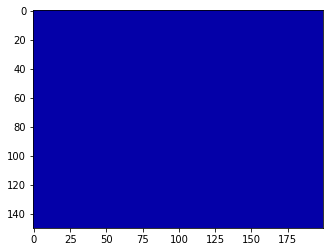

loss at step 10: 28974.66015625


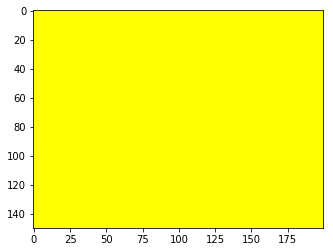

loss at step 20: 2736.043701171875


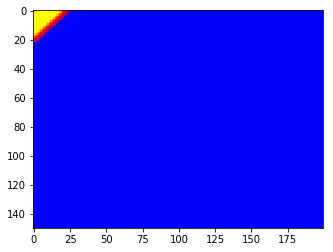

loss at step 30: 1560899.625


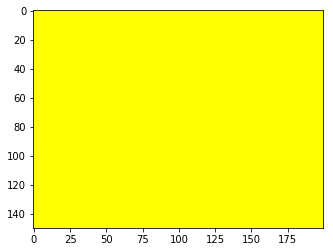

loss at step 40: 400.8169860839844


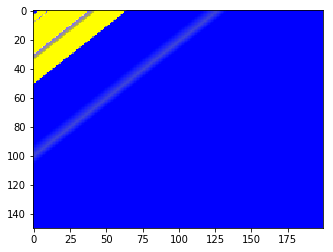

loss at step 50: 1.6070836782455444


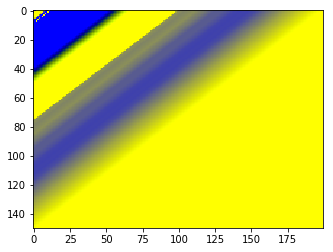

loss at step 60: 1.8041610717773438


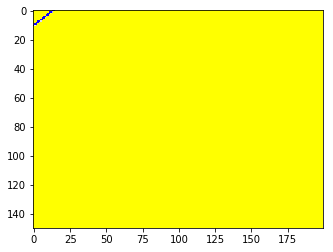

loss at step 70: 0.3010651171207428


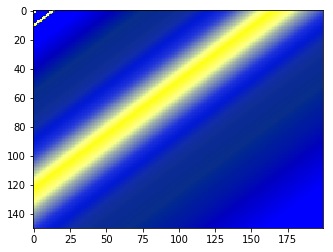

loss at step 80: 0.0904325321316719


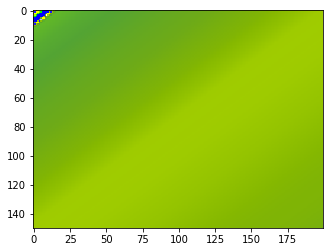

loss at step 90: 0.07690518349409103


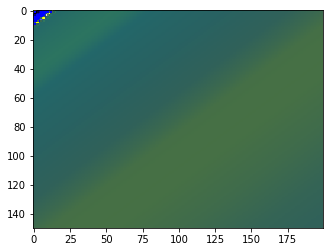

loss at step 100: 0.05362841859459877


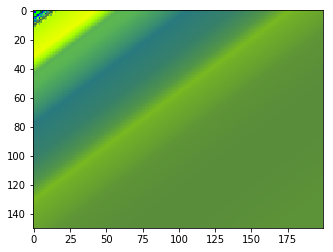

loss at step 200: 0.009619979187846184


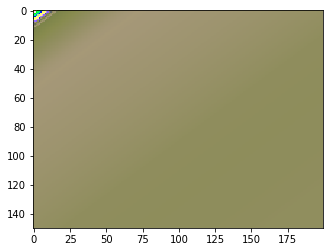

loss at step 300: 0.008745246566832066


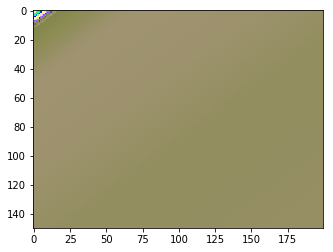

loss at step 400: 0.00811453815549612


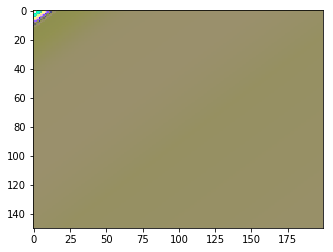

loss at step 500: 0.007663724943995476


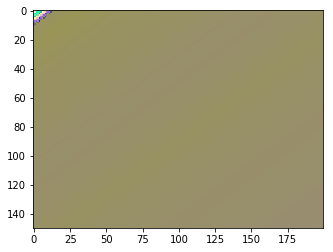

loss at step 600: 0.007481598760932684


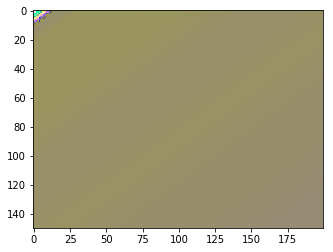

loss at step 700: 0.00793477613478899


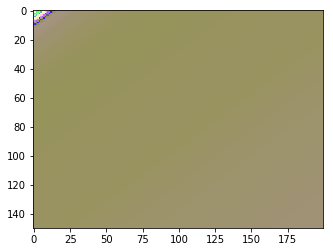

loss at step 800: 0.007531074807047844


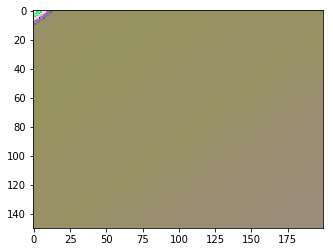

loss at step 900: 0.007441612426191568


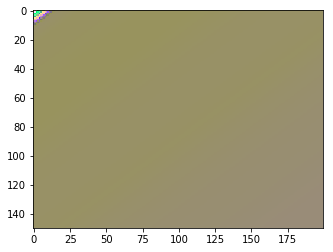

loss at step 1000: 0.007371342740952969


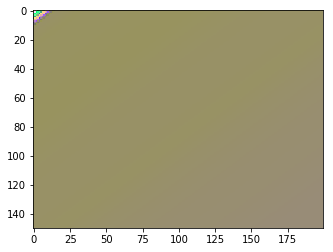

loss at step 1100: 0.007531122304499149


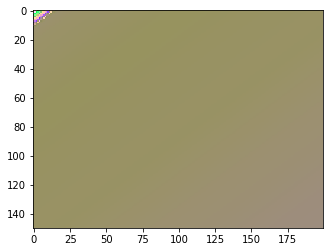

loss at step 1200: 0.007371849380433559


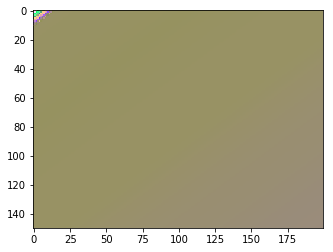

loss at step 1300: 0.007416746579110622


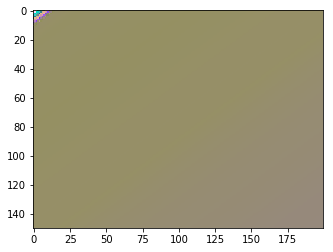

loss at step 1400: 0.00753899896517396


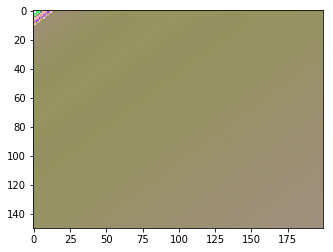

loss at step 1500: 0.007307794876396656


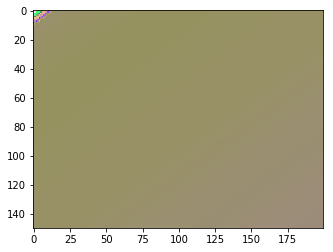

KeyboardInterrupt: 

In [33]:
feed_dict = {x : train_x, y : train_y, learning_rate: 0.1}
for step in range(30000):
    if (step < 100 and step % 10 == 0) or step % 100 == 0:
        l, predictions = sess.run(
            [loss, out], feed_dict = feed_dict
        )
        print('loss at step {0}: {1}'.format(step, l))
        painting = predictions.reshape((img.shape[0], img.shape[1], 3))
        painting[painting>1] = 1
        painting[painting<0] = 0
        plt.imshow(painting)
        fname = "image_seq/%04d.png" % seq
        plt.imsave(fname, painting)
        plt.show()
        seq += 1
        #plt.hist(predictions)
        #plt.show()
        
        
    _ = sess.run(
        [optimizer], feed_dict = feed_dict
    )

    

So While is is training, let's go over some other concepts that we skipped.

## Loss Function

Loss function is the function that measures how far are you from a correct prediction. To make your life easy, there are two main functions that you will have to deal with. 

- For classification, use cross entropy
- For regression, use mean squared

## Optimizer

There are so many optimization functions that updates your weight values and biases. The most famous one (although not really used in production much) is Gradient Descent. The function that we are using here is called Adam Optimizer.

## Calculation of Multiple Inputs

The way you calculate multiple inputs is this:

![](images/painter.png)

$ Node_{1,1} = (w_{(1,1)} x_1 + b_{(1,1)}) + (w_{(2,1)} x_2 + b_{(1,1)})$

Then you can apply the activation function to that.

## Initialization of wieght values

We initialized weight values with a standard deviation of 0.01 and the reason for that is we know that the values for output should be between 0,1 (which is the stadard format for GRB in here). Initializing the network's weights with values very close to 0 but to quite 0 will allow the output to be small enough that it will be around the desired output that we want.

## Why ReLU?

One more thing that we skipped through is why did we choose rectifier activation. The reason is first, we don't want negative output.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 0: 0.0022454524878412485


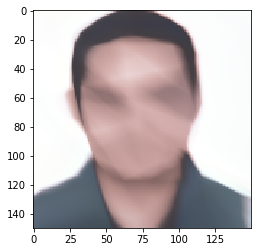

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 500: 0.002034383360296488


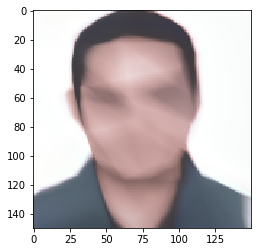

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 1000: 0.0019454010762274265


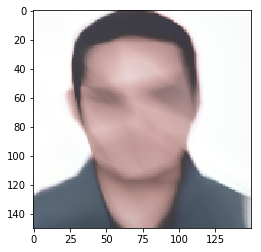

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 1500: 0.0018444970482960343


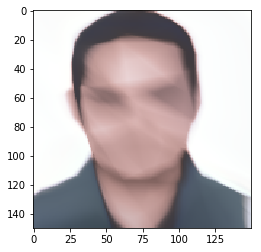

In [26]:
feed_dict = {x : train_x, y : train_y, learning_rate: 0.0001}
for step in range(2000):
    _ = sess.run(
        [optimizer], feed_dict = feed_dict
    )

    if step % 500 == 0:
        l, predictions = sess.run(
            [loss, out], feed_dict = feed_dict
        )
        print('loss at step {0}: {1}'.format(step, l))
        plt.imshow(predictions.reshape((img.shape[0], img.shape[1], 3)))
        fname = "image_seq/%04d.png" % seq
        plt.imsave(fname, predictions.reshape((img.shape[0], img.shape[1], 3)))
        plt.show()
        seq += 1
        #plt.hist(predictions)
        #plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 0: 0.0012141595361754298


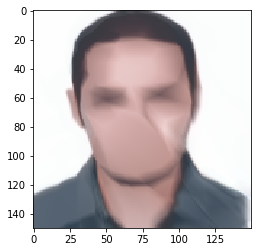

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 500: 0.001206237473525107


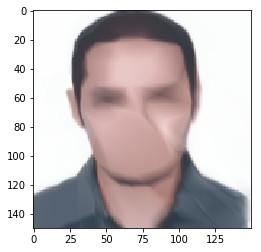

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 1000: 0.001196705037727952


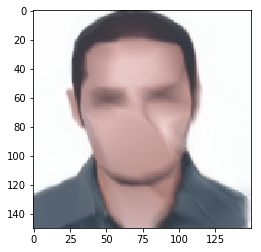

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 1500: 0.001184494118206203


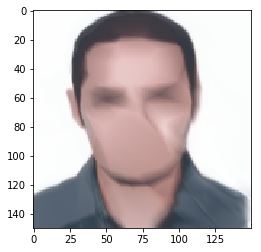

In [18]:
feed_dict = {x : train_x, y : train_y, learning_rate: 0.00001}
for step in range(2000):
    _ = sess.run(
        [optimizer], feed_dict = feed_dict
    )

    if step % 500 == 0:
        l, predictions = sess.run(
            [loss, out], feed_dict = feed_dict
        )
        print('loss at step {0}: {1}'.format(step, l))
        plt.imshow(predictions.reshape((img.shape[0], img.shape[1], 3)))
        fname = "image_seq/%04d.png" % seq
        plt.imsave(fname, predictions.reshape((img.shape[0], img.shape[1], 3)))
        plt.show()
        seq += 1
        #plt.hist(predictions)
        #plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 0: 0.0011687794467434287


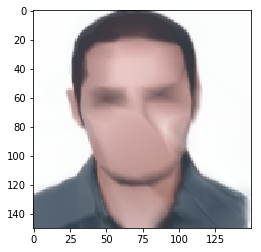

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 10: 0.001168742193840444


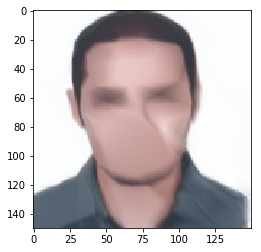

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 20: 0.0011687043588608503


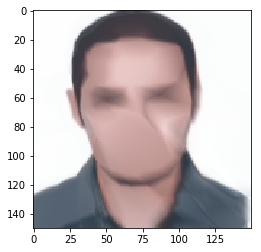

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 30: 0.0011686686193570495


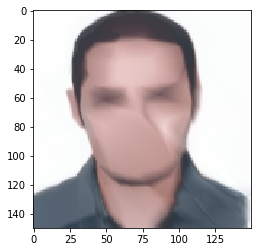

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 40: 0.0011686340440064669


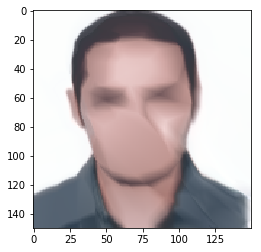

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 50: 0.0011685993522405624


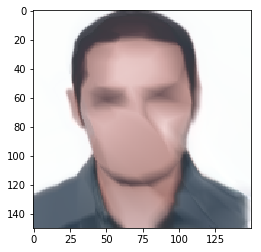

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 60: 0.0011685638455674052


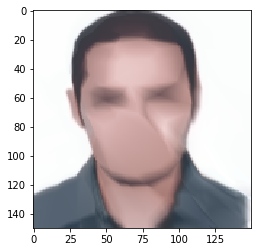

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 70: 0.0011685279896482825


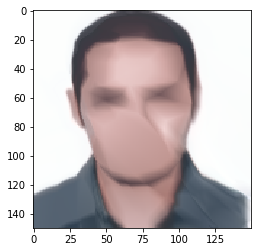

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 80: 0.0011684943456202745


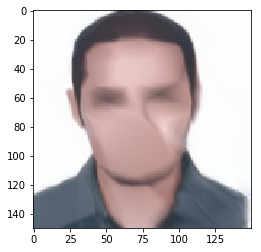

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 90: 0.00116845837328583


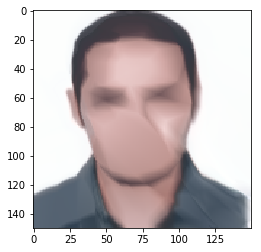

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 100: 0.0011684229830279946


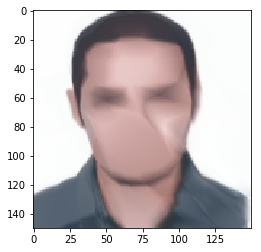

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 110: 0.0011683866614475846


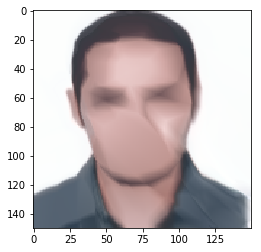

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 120: 0.001168351387605071


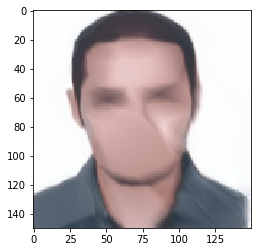

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 130: 0.0011683152988553047


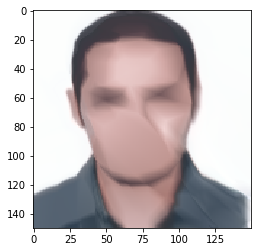

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 140: 0.001168278744444251


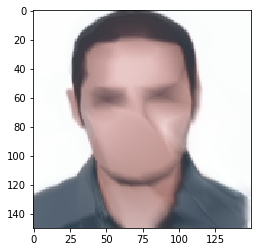

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 150: 0.0011682428885251284


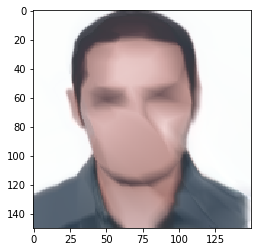

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 160: 0.001168206101283431


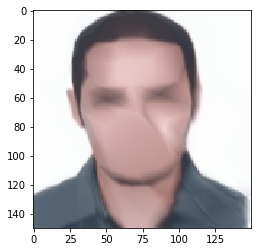

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 170: 0.0011681694304570556


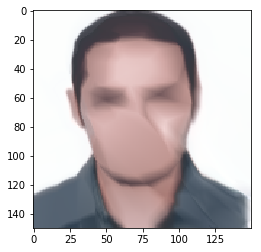

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 180: 0.0011681318283081055


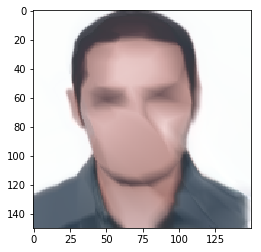

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loss at step 190: 0.0011680949246510863


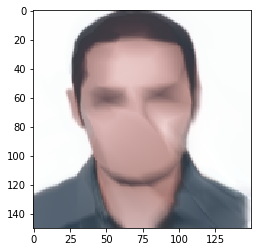

In [19]:
feed_dict = {x : train_x, y : train_y, learning_rate: 0.00001}
for step in range(200):
    _ = sess.run(
        [optimizer], feed_dict = feed_dict
    )

    if step % 10 == 0:
        l, predictions = sess.run(
            [loss, out], feed_dict = feed_dict
        )
        print('loss at step {0}: {1}'.format(step, l))
        plt.imshow(predictions.reshape((img.shape[0], img.shape[1], 3)))
        fname = "image_seq/%04d.png" % seq
        plt.imsave(fname, predictions.reshape((img.shape[0], img.shape[1], 3)))
        plt.show()
        seq += 1
        #plt.hist(predictions)
        #plt.show()